In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [0]:
!ls 'drive/My Drive/Hackathon/Hackathon/CreditScore/'

CreditScore_test.csv  CreditScore_train.csv


In [0]:
credit_train = pd.read_csv('drive/My Drive/Hackathon/Hackathon/CreditScore/CreditScore_train.csv')
credit_test = pd.read_csv('drive/My Drive/Hackathon/Hackathon/CreditScore/CreditScore_test.csv')

In [0]:
credit_train.shape

(80000, 305)

In [0]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 305 entries, x001 to y
dtypes: float64(41), int64(264)
memory usage: 186.2 MB


In [0]:
credit_train.describe()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,...,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
count,8.000000e+04,62815.000000,62815.000000,62819.000000,75133.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,26779.000000,26779.000000,26137.000000,80000.000000,80000.000000,80000.000000,74248.000000,8.000000e+04,8.000000e+04,34993.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,8.000000e+04,8.000000e+04,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,60162.000000,40211.000000,40211.000000,40211.000000,8.000000e+04,8.000000e+04,39109.000000,80000.000000,10723.000000,8.000000e+04,33562.000000,80000.000000,80000.000000,80000.000000,80000.000000,21529.000000,80000.000000,14544.000000,80000.000000
mean,1.218319e+06,125.607307,25.582520,65.379646,178.043563,0.313787,0.692450,1.385575,1.188738,1.026825,1.839063,1.606262,1.578450,4.316212,12.941125,4.084825,8.856300,3.988138,2.144775,6.801800,2.281075,1.731150,1.084950,4.729163,0.318050,0.569312,0.750938,0.800600,1.478512,4.041400,5.349062,0.264425,0.811075,1.696613,3.133138,3.224512,0.158112,0.490187,1.009337,1.863175,...,21.148773,23.841313,0.705271,0.372075,0.383675,0.402625,0.593283,6.818067e+04,4.857168e+03,0.920424,0.254375,0.282838,0.345863,6.560368e+04,9.380788e+03,5.622289e+04,0.865325,0.87345,0.883900,1.390888,0.113925,3.230245,51.718783,25.497351,38.369849,1.465098e+04,5.831120e+04,0.812702,2754.074875,0.901421,1.189691e+04,0.794797,0.543787,0.558600,0.582375,0.105762,2.941196,6443.203675,1.037589,619.397762
std,2.730146e+05,115.662548,49.067905,63.528938,124.431075,0.464034,1.364931,2.274164,2.014353,1.715173,2.699709,2.579979,2.619009,5.496019,11.970131,4.620135,9.258176,2.363661,1.748407,7.836717,3.158053,1.122056,1.012236,7.144087,0.465722,0.495176,0.432473,1.584888,2.048631,4.790608,7.756906,0.887786,1.818254,3.112473,5.051852,3.470966,0.402356,0.809127,1.343763,2.183584,...,20.545854,21.078103,0.254211,0.483361,0.486283,0.490430,5.214060,1.792004e+05,2.763618e+04,14.504364,0.935443,1.002324,1.126813,1.783471e+05,4.787382e+04,1.718601e+05,0.341378,0.33247,0.320347,2.685337,0.686314,3.086392,52.824918,34.752026,38.950491,3.604838e+04,1.656693e+05,0.315029,13013.804143,0.430168,3.325378e+04,0.281969,0.498082,0.496557,0.493171,0.307535,2.128464,24319.031452,0.328551,118.357217
min,5.170000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,300.000000
25%,9.745528e+05,32.000000,3.000000,19.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000

In [0]:
credit_train.head(5)

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,...,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,2,4,4,9,19,5,14,8,5,6,2,3,2,1,1,1,1,6,1,5,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,0,0,0.1943,484289,0,NaN,0,0,0,484289,0,484289,1,1,1,0,0,1.0,NaN,NaN,NaN,0,346762,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,807
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,3,3,7,5,21,5,16,5,3,9,2,3,1,9,1,1,1,3,9,6,0,0,0,0,0,0,0,0,0,0,...,2.0,5.5,0.8417,1,1,1,0.2356,125307,0,NaN,0,0,0,125307,0,125307,1,1,1,2,0,1.0,9.0,2.0,5.5,17318,124634,0.8417,0,NaN,17318,0.8417,1,1,1,0,NaN,0,NaN,819
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,1,0,0,6,8,3,5,4,2,7,3,3,2,0,0,0,1,0,0,4,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,0,0,0,0.0308,706,0,NaN,0,0,0,706,0,706,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,803
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,0,2,2,0,4,0,4,2,0,0,0,0,0,3,0,0,0,0,0,0,7,0,0,1,4,6,0,0,1,3,...,NaN,NaN,NaN,0,0,0,0.3025,619,619,0.8123,0,0,0,0,0,0,1,1,1,0,0,9.0,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,1,1,1,0,NaN,0,NaN,530
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,1,2,0,0,5,2,3,2,2,2,1,1,1,3,0,1,1,0,3,2,3,0,1,1,1,3,0,1,1,1,...,2.0,2.0,1.0180,1,1,1,0.8402,38837,21424,0.7357,1,1,1,17839,426,17413,1,1,1,1,0,9.0,2.0,2.0,2.0,17413,17413,1.0180,0,NaN,17413,1.0180,1,1,1,0,NaN,0,NaN,485


Remove columns which has null greater than 40%

In [0]:
rmv_null = []
for col in credit_train.columns:
  if (credit_train[col].isna().sum()/len(credit_train))*100 > 40:
    rmv_null.append(col)
print(rmv_null)

['x098', 'x148', 'x155', 'x162', 'x242', 'x253', 'x255', 'x256', 'x257', 'x259', 'x265', 'x266', 'x267', 'x268', 'x275', 'x288', 'x289', 'x290', 'x293', 'x295', 'x297', 'x302', 'x304']


Remove x001 column which has unique values for all rows

In [0]:
rmv_null.append('x001')

In [0]:
len(rmv_null)

24

In [0]:
credit_train.drop(columns=rmv_null,axis=1,inplace=True)
credit_test.drop(columns=rmv_null,axis=1,inplace=True)

Remove columns which has only one value

In [0]:
unq_val = []
for col in credit_train.columns:
  if (credit_train[col].nunique()) == 1:
    unq_val.append(col)

In [0]:
credit_train.drop(columns=unq_val,axis=1,inplace=True)
credit_test.drop(columns=unq_val,axis=1,inplace=True)

Impute null values with mean

In [0]:
null_fix = []
for col in credit_train.columns:
   if credit_train[col].isna().sum() > 0:
     print(col,credit_train[col].isna().sum(),(credit_train[col].isna().sum()/len(credit_train))*100)
     null_fix.append(col)

x002 17185 21.48125
x003 17185 21.48125
x004 17181 21.47625
x005 4867 6.08375
x041 29514 36.8925
x044 15753 19.69125
x045 15753 19.69125
x057 29514 36.8925
x058 29514 36.8925
x222 29625 37.03125
x223 29691 37.11375
x234 15316 19.145
x235 16095 20.11875
x237 29434 36.7925
x238 29434 36.7925
x239 29434 36.7925
x272 5752 7.19
x287 19838 24.7975


In [0]:
for col in null_fix:
  rpl = credit_train[col].mean()
  credit_train[col].fillna(rpl,inplace=True)

In [0]:
null_fix = []
for col in credit_test.columns:
   if credit_test[col].isna().sum() > 0:
     print(col,credit_test[col].isna().sum(),(credit_test[col].isna().sum()/len(credit_test))*100)
     null_fix.append(col)

x002 4247 21.235
x003 4247 21.235
x004 4243 21.215
x005 1243 6.215
x041 7358 36.79
x044 3921 19.605
x045 3921 19.605
x057 7358 36.79
x058 7358 36.79
x222 7362 36.809999999999995
x223 7378 36.89
x234 3794 18.970000000000002
x235 3988 19.939999999999998
x237 7310 36.55
x238 7310 36.55
x239 7310 36.55
x272 1437 7.185
x287 4983 24.915000000000003


In [0]:
for col in null_fix:
  rpl = credit_test[col].mean()
  credit_test[col].fillna(rpl,inplace=True)

In [0]:
credit_train.corr()

,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,...,x248,x249,x250,x251,x252,x254,x258,x260,x261,x262,x263,x264,x269,x270,x271,x272,x273,x274,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
x002,1.000000,0.295846,0.830995,0.698280,0.104811,-0.126717,-0.150020,-0.076120,-0.021576,0.040720,0.076767,0.135105,0.486157,0.234103,0.191101,0.207312,0.245979,0.252486,0.298930,0.210444,0.295988,0.284275,-0.044234,0.350720,0.069652,0.152773,0.306666,0.120045,0.293977,-0.217846,-0.083618,-0.122875,-0.174928,-0.208876,-0.240210,-0.094943,-0.135402,-0.195695,-0.235546,-0.265703,...,0.303788,0.378017,0.343028,0.327068,0.032559,0.056913,0.222311,0.342868,0.344077,0.345621,-0.018164,0.014987,-0.038539,-0.036651,-0.028627,-0.025027,0.230461,0.002272,-0.085909,-0.084612,-0.083789,0.231814,0.050786,0.226417,0.006186,0.002144,0.000824,-0.033735,-0.056955,-0.178573,0.040583,0.205382,-0.020189,0.051894,-0.114180,-0.115676,-0.113392,-0.071393,0.007062,0.431719
x003,0.295846,1.000000,0.705125,0.211875,0.211660,-0.252796,-0.277558,-0.197480,-0.158111,-0.140125,-0.093246,-0.063239,0.018041,-0.165874,-0.229966,-0.099702,-0.130802,-0.235738,-0.117076,-0.196586,-0.056583,-0.173019,-0.142611,0.006463,-0.137213,-0.041837,-0.031093,-0.148106,-0.109816,-0.169564,-0.068288,-0.109779,-0.143677,-0.161156,-0.207728,-0.085715,-0.133658,-0.176171,-0.199106,-0.154123,...,-0.043917,0.018942,-0.027877,-0.045392,0.051387,0.030333,-0.052633,-0.042120,-0.040713,-0.036856,-0.241322,-0.198510,-0.228770,-0.227861,-0.222599,0.012574,-0.077160,0.023772,-0.043555,-0.045950,-0.048874,-0.078300,0.009285,-0.083842,-0.041045,-0.039746,-0.035037,-0.157320,-0.016649,0.028389,-0.129416,-0.078352,-0.024806,-0.130584,-0.257124,-0.256150,-0.248728,-0.012342,-0.061310,0.108048
x004,0.830995,0.705125,1.000000,0.587470,0.201660,-0.263156,-0.301296,-0.201714,-0.134369,-0.069894,-0.005294,0.059751,0.356002,0.049184,-0.016879,0.072015,0.084263,0.023386,0.113132,-0.001269,0.169884,0.087921,-0.109814,0.241655,-0.033228,0.084192,0.184442,-0.019483,0.118332,-0.263925,-0.103346,-0.156684,-0.215456,-0.251081,-0.305628,-0.120516,-0.179724,-0.249974,-0.294306,-0.275240,...,0.176390,0.267595,0.210926,0.190727,0.049406,0.052744,0.118208,0.206465,0.208245,0.211905,-0.160653,-0.124653,-0.168194,-0.165771,-0.156003,-0.012165,0.108366,0.014387,-0.086250,-0.086232,-0.085561,0.108646,0.044243,0.100423,-0.014800,-0.017062,-0.015791,-0.100992,-0.040875,-0.106131,-0.050893,0.090985,-0.019335,-0.047604,-0.232999,-0.233036,-0.226818,-0.048765,-0.020803,0.373485
x005,0.698280,0.211875,0.587470,1.000000,0.120654,-0.057133,-0.071699,-0.022244,0.025753,0.097916,0.124923,0.192119,0.601528,0.353557,0.191201,0.361707,0.396920,0.325241,0.428496,0.232651,0.455461,0.362422,-0.005363,0.447964,0.180350,0.295891,0.372427,0.213022,0.413070,-0.197948,-0.075092,-0.105893,-0.156448,-0.190917,-0.216630,-0.083873,-0.114908,-0.174861,-0.215309,-0.268821,...,0.321962,0.484874,0.413619,0.339691,0.028398,0.106716,0.218980,0.375244,0.380048,0.387999,0.065558,0.070443,0.029014,0.031850,0.041343,-0.038474,0.228328,0.016843,-0.077921,-0.076835,-0.077640,0.227829,0.050463,0.222372,0.132207,0.117310,0.098882,-0.054347,-0.064191,-0.245613,0.048810,0.205256,-0.023020,0.061921,-0.066023,-0.069295,-0.069434,-0.096474,-0.011478,0.561643
x006,0.104811,0.211660,0.201660,0.120654,1.000000,-0.128551,-0.111536,-0.006926,0.023741,0.055588,0.057186,0.066786,0.121001,0.076078,-0.113815,0.155161,0.160862,-0.074899,0.083788,-0.166315,0.231601,-0.136455,0.011274,0.089307,0.064332,0.387572,0.071073,0.045469,0.082023,-0.008079,-0.024816,-0.035207,-0.039830,-0.027734,-0.017012,-0.030335,-0.047348,-0.053112,-0.041652,-0.101755,...,0.053139,0.094582,0.076865,0.054675,0.035484,0.043669,0.030993,0.059525,0.062900,0.066064,-0.011583,-0.023767,0.004280,0.0068

In [0]:
inp_cols = list(credit_train.columns)
inp_cols.remove('y')

In [0]:
print(inp_cols)

['x002', 'x003', 'x004', 'x005', 'x006', 'x007', 'x008', 'x009', 'x010', 'x011', 'x012', 'x013', 'x014', 'x015', 'x016', 'x017', 'x018', 'x019', 'x020', 'x021', 'x022', 'x023', 'x024', 'x025', 'x026', 'x027', 'x028', 'x029', 'x030', 'x031', 'x032', 'x033', 'x034', 'x035', 'x036', 'x037', 'x038', 'x039', 'x040', 'x041', 'x042', 'x043', 'x044', 'x045', 'x046', 'x047', 'x048', 'x049', 'x050', 'x051', 'x052', 'x053', 'x054', 'x055', 'x056', 'x057', 'x058', 'x059', 'x060', 'x061', 'x062', 'x063', 'x064', 'x065', 'x066', 'x068', 'x069', 'x070', 'x071', 'x072', 'x073', 'x074', 'x075', 'x076', 'x077', 'x078', 'x079', 'x080', 'x081', 'x082', 'x083', 'x084', 'x085', 'x086', 'x087', 'x088', 'x089', 'x090', 'x091', 'x092', 'x093', 'x097', 'x099', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131',

Find columns to do one hot encoding

In [0]:
credit_train.shape

(80000, 277)

In [0]:
cat_col = []
prt = []
i=0
for col in credit_train.columns:
  cnt = credit_train[col].nunique()
  if cnt > 2 and cnt < 10:
    print(col,i,cnt)
    cat_col.append(i)
    prt.append(col)
  i = i + 1

x022 20 7
x023 21 6
x037 35 5
x049 47 9
x050 48 8
x051 49 8
x052 50 8
x053 51 9
x068 65 7
x077 74 3
x078 75 5
x079 76 9
x252 241 4
x287 266 9


In [0]:
credit_train[prt].apply(lambda x: print(x.unique()))

[3. 0. 1. 2. 4. 5. 6.]
[2. 1. 0. 3. 4. 5.]
[0. 1. 4. 2. 3.]
[0. 1. 3. 5. 2. 4. 6. 7. 9.]
[0. 1. 2. 3. 4. 6. 5. 7.]
[0. 1. 2. 3. 6. 4. 5. 7.]
[0. 2. 1. 3. 5. 4. 7. 6.]
[0. 4. 1. 2. 3. 7. 5. 6. 8.]
[0. 1. 3. 2. 5. 8. 4.]
[0. 1. 2.]
[0. 1. 2. 3. 6.]
[ 0.  1.  2.  3.  4. 20.  5. 11.  6.]
[0. 1. 2. 3.]
[1.         3.23024501 9.         5.         2.         3.
 4.         8.         7.        ]


x022    None
x023    None
x037    None
x049    None
x050    None
x051    None
x052    None
x053    None
x068    None
x077    None
x078    None
x079    None
x252    None
x287    None
dtype: object

In [0]:
credit_test[prt].apply(lambda x: print(x.unique()))

[2. 3. 1. 0. 4. 5.]
[1. 3. 2. 0. 4. 5.]
[0. 1. 3. 2. 4.]
[0. 1. 2. 3. 4. 5. 6.]
[0. 1. 2. 3. 4. 5.]
[0. 1. 2. 6. 3. 4. 5.]
[0. 1. 2. 4. 3. 5. 7.]
[0. 1. 2. 3. 4. 5. 8.]
[0. 1. 4. 2. 3.]
[0. 1. 3. 2.]
[0. 1. 2. 3. 5.]
[0. 1. 3. 6. 2. 4. 5.]
[0. 2. 1. 3.]
[5.         2.         1.         9.         3.27562096 4.
 3.         7.         8.        ]


x022    None
x023    None
x037    None
x049    None
x050    None
x051    None
x052    None
x053    None
x068    None
x077    None
x078    None
x079    None
x252    None
x287    None
dtype: object

One hot encoding

In [0]:
credit_train['src'] = 0
credit_test['src'] = 1

In [0]:
src = pd.concat([credit_train,credit_test])

In [0]:
src = pd.get_dummies(data=src, columns=prt)

In [0]:
train = src[src['src'] == 0]
test = src[src['src'] == 1]

Find columns which are highly correlated

In [0]:
df = train.corr()
corr_df = {}
values = list(df['y'])
cols= df.columns
for i in range(0,len(values)):
  corr_df[cols[i]] = values[i]

In [0]:
corr_df

{'src': nan,
 'x002': 0.4317186684452963,
 'x003': 0.10804757272360498,
 'x004': 0.3734851801987169,
 'x005': 0.561642638283013,
 'x006': 0.09255232206355948,
 'x007': 0.008622898610107795,
 'x008': -0.022149918356582747,
 'x009': -0.0005534482438361254,
 'x010': 0.043540491190818584,
 'x011': 0.1151464558030753,
 'x012': 0.11912045483889065,
 'x013': 0.1779539632686869,
 'x014': 0.4721856636109322,
 'x015': 0.3093188149610504,
 'x016': 0.1938540082728492,
 'x017': 0.30318660361053246,
 'x018': 0.40935276152259725,
 'x019': 0.4116193784603157,
 'x020': 0.41561445502125877,
 'x021': 0.24202769120196993,
 'x022_0': -0.39531326337591816,
 'x022_1': -0.21352303552218085,
 'x022_2': 0.04402699486796417,
 'x022_3': 0.45680655727243447,
 'x022_4': 0.12914505972348858,
 'x022_5': 0.029347616296315816,
 'x022_6': 0.005819575704928576,
 'x023_0': -0.49791725032242745,
 'x023_1': 0.129075433492134,
 'x023_2': 0.2788280436240594,
 'x023_3': 0.20441314356531606,
 'x023_4': 0.027707538449742983,
 'x

Select columns which has correlation greater than 0.15

In [0]:
sel_lst = []
for key,value in corr_df.items():
  if abs(value) > 0.15:
    sel_lst.append(key)

In [0]:
len(sel_lst)

202

In [0]:
inp_cols = list(sel_lst)
inp_cols.remove('y')
X_train = train[inp_cols]
Y_train = train['y']
X_test = test[inp_cols]
Y_test = test['y']

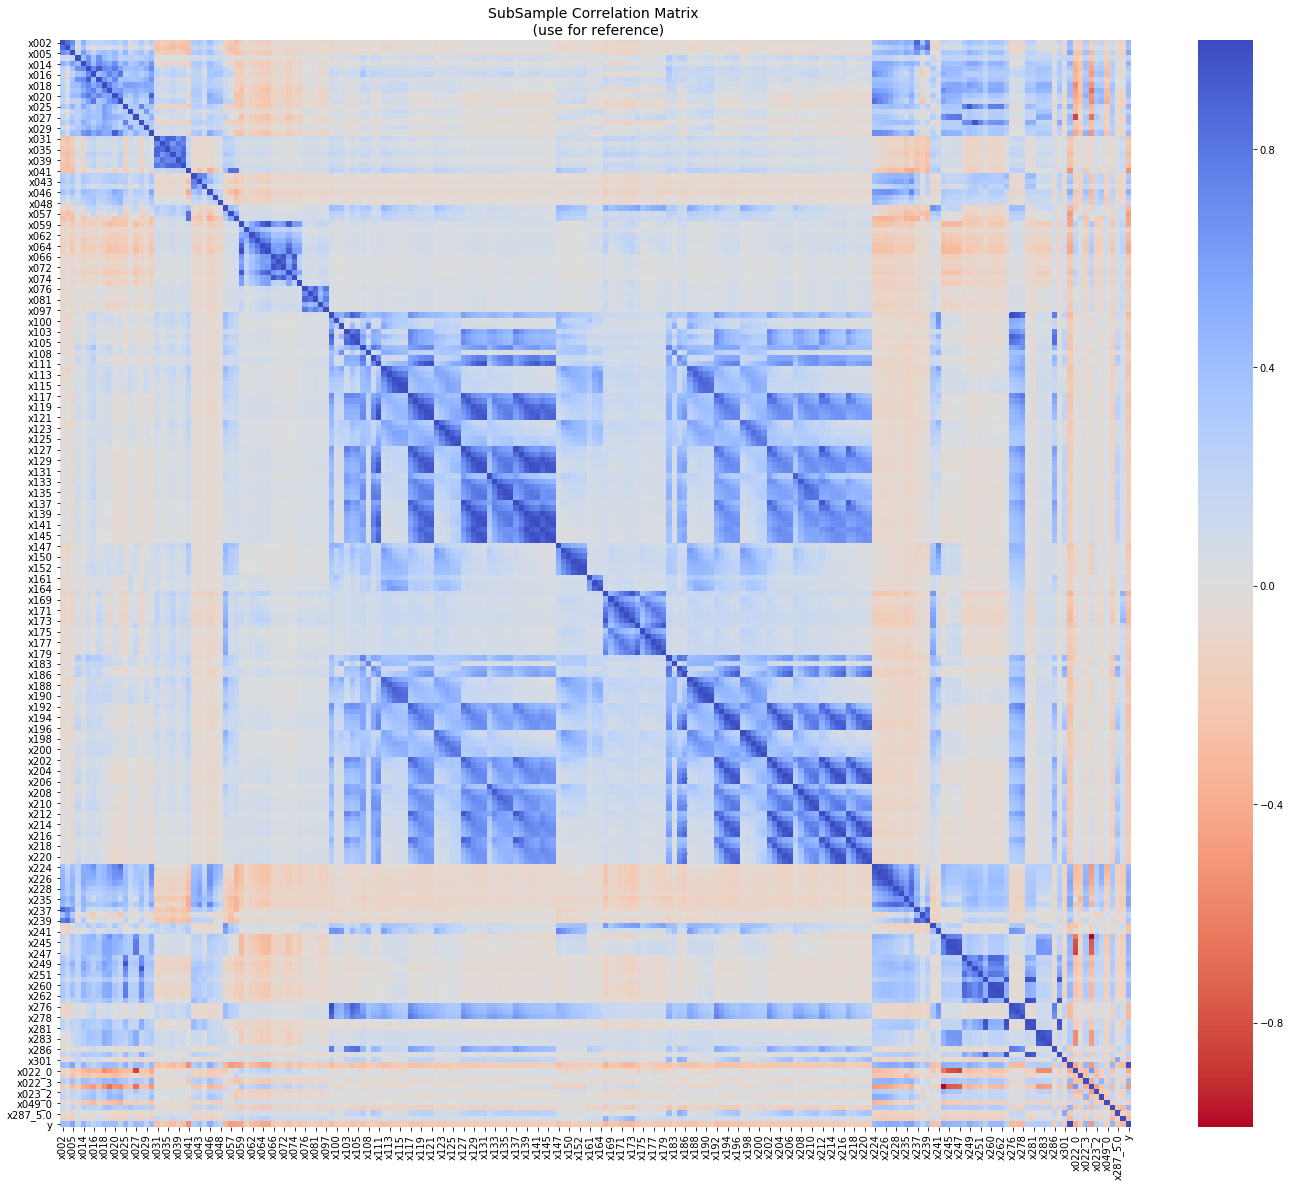

In [0]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline

sel_lst.append('y')
f, (ax2) = plt.subplots(1, 1, figsize=(24,20))
new_df = train[sel_lst].sample(frac=1, random_state=42)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

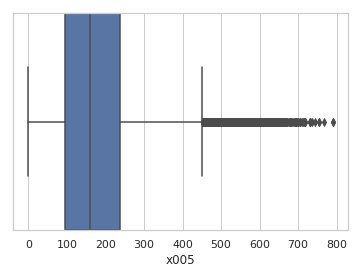

In [0]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=train['x005'],width=1.0)

In [0]:
print(X_train.shape)
print(X_test.shape)

(29278, 201)
(20000, 201)


In [0]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [0]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

In [0]:
X_train.shape

(80000, 268)

Tried PCA but RMSE increases

In [0]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=50)
# X_train = pca.fit_transform(X_train)
# X_test = pca.fit_transform(X_test)

In [0]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()
lm.fit(X_train,Y_train)
Y_train_predict = lm.predict(X_train)
Y_test_predict = lm.predict(X_test)
print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

RMSE Train: 1.9203526925235571e-13
RMSE Test: 91.87130457258587
MAE Train 8.847149229264278e-14
MAE Test 80.17831930286592


**SVR taking more time -- Need more time to work on SVR**

In [0]:
from sklearn.svm import SVR
SVR = SVR(kernel='linear')
SVR.fit(X_train,Y_train)
Y_train_predict = SVR.predict(X_train)
Y_test_predict = SVR.predict(X_test)
print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))

In [0]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=1, normalize=False)
ridgeReg.fit(X_train,Y_train)
Y_train_predict = ridgeReg.predict(X_train)
Y_test_predict = ridgeReg.predict(X_test)
print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

RMSE Train: 0.004139177633946104
RMSE Test: 91.87149193224336
MAE Train 0.0030491358263768677
MAE Test 80.17971009386476


In [0]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.005, normalize=False)
lassoReg.fit(X_train,Y_train)
Y_train_predict = lassoReg.predict(X_train)
Y_test_predict = lassoReg.predict(X_test)
print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

RMSE Train: 0.005000000000009443
RMSE Test: 91.87413263744827
MAE Train 0.00359523476774876
MAE Test 80.18000411397438


In [0]:
from sklearn.linear_model import ElasticNet
ENreg = ElasticNet(alpha=1, l1_ratio=1, normalize=False)
ENreg.fit(X_train,Y_train)
Y_train_predict = ENreg.predict(X_train)
Y_test_predict = ENreg.predict(X_test)
print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

RMSE Train: 49.09173309106133
RMSE Test: 56.717745075870454
MAE Train 37.53104737053782
MAE Test 44.35599744354643


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
sel = RandomForestRegressor(n_estimators=1000,max_depth=10,max_features='log2',min_samples_split=3)
sel.fit(X_train, Y_train)
Y_train_predict = sel.predict(X_train)
Y_test_predict = sel.predict(X_test)
print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

RMSE Train: 38.179266306382345
RMSE Test: 42.00468223671286
MAE Train 29.695754542637307
MAE Test 33.36887087874939


**Grid search for Random forest**

In [0]:
for i in range(1, 20):
    print('Accuracy score using max_depth =', i, end = ': ')
    sel = RandomForestRegressor(max_depth=i)
    sel.fit(X_train, Y_train)
    Y_train_predict = sel.predict(X_train)
    Y_test_predict = sel.predict(X_test)
    print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
    print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
    print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
    print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

Accuracy score using max_depth = 1: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 72.90760691733821
RMSE Test: 76.31785153168312
MAE Train 58.41000273062394
MAE Test 60.86245880036896
Accuracy score using max_depth = 2: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 65.57593659116428
RMSE Test: 71.43746937297048
MAE Train 52.168371232681444
MAE Test 55.611616104217994
Accuracy score using max_depth = 3: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 56.9661425928735
RMSE Test: 60.503300366337065
MAE Train 43.735038563652225
MAE Test 46.17230339071725
Accuracy score using max_depth = 4: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 52.58431459382338
RMSE Test: 56.8369874693382
MAE Train 40.0336455572812
MAE Test 43.929952084647994
Accuracy score using max_depth = 5: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 48.489065929130646
RMSE Test: 56.104566197934815
MAE Train 36.94029744171259
MAE Test 43.21560023766679
Accuracy score using max_depth = 6: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 45.380727521691384
RMSE Test: 54.978741732483364
MAE Train 34.71325844337587
MAE Test 42.24353959145152
Accuracy score using max_depth = 7: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 42.914184428604024
RMSE Test: 54.46561709902516
MAE Train 32.68387050411877
MAE Test 42.02306058720199
Accuracy score using max_depth = 8: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 40.46977771767563
RMSE Test: 53.79957038986943
MAE Train 30.857728956830112
MAE Test 41.48594871911417
Accuracy score using max_depth = 9: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 38.0651322225466
RMSE Test: 54.76042758799057
MAE Train 28.881451868058402
MAE Test 41.79356207066036
Accuracy score using max_depth = 10: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 35.411852633383575
RMSE Test: 52.6288281947003
MAE Train 26.839796525950934
MAE Test 40.7872925729101
Accuracy score using max_depth = 11: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 32.82757211450809
RMSE Test: 54.80294704217112
MAE Train 24.909322199137016
MAE Test 41.78928744951881
Accuracy score using max_depth = 12: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 30.08259586716164
RMSE Test: 54.45044121693779
MAE Train 22.772422698161932
MAE Test 42.100525593245905
Accuracy score using max_depth = 13: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 27.32933524844534
RMSE Test: 53.84566521915528
MAE Train 20.705406387841983
MAE Test 41.87870498981806
Accuracy score using max_depth = 14: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 24.881062959444755
RMSE Test: 54.59717871340211
MAE Train 18.782110526262336
MAE Test 42.46862950786679
Accuracy score using max_depth = 15: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 22.75810303151501
RMSE Test: 54.457595578945394
MAE Train 17.038963519624176
MAE Test 42.26679462211318
Accuracy score using max_depth = 16: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 20.952707916478655
RMSE Test: 55.56498066991805
MAE Train 15.62050454705304
MAE Test 43.236414963973765
Accuracy score using max_depth = 17: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 19.593918796533366
RMSE Test: 53.5211115980029
MAE Train 14.51040941152161
MAE Test 42.136791552614326
Accuracy score using max_depth = 18: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 18.42273886669049
RMSE Test: 55.34434721943181
MAE Train 13.520629292121741
MAE Test 43.252475955234424
Accuracy score using max_depth = 19: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 17.80810803505255
RMSE Test: 55.81317000300641
MAE Train 12.948411881523656
MAE Test 43.80929730333057


In [0]:
for i in ['auto','sqrt','log2',0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    print('Accuracy score using max_features =', i, end = ': ')
    sel = RandomForestRegressor(max_depth=5,max_features=i)
    sel.fit(X_train, Y_train)
    Y_train_predict = sel.predict(X_train)
    Y_test_predict = sel.predict(X_test)
    print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
    print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
    print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
    print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

Accuracy score using max_features = auto: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 48.533995311781354
RMSE Test: 56.35843572107698
MAE Train 37.012261591776806
MAE Test 43.2982110640723
Accuracy score using max_features = sqrt: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 54.99514719182615
RMSE Test: 61.95731709062556
MAE Train 43.86771772837681
MAE Test 50.68448102348439
Accuracy score using max_features = log2: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 61.39152316418266
RMSE Test: 73.39355319984254
MAE Train 49.725646322173645
MAE Test 61.18228833694437
Accuracy score using max_features = 0.1: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 57.83139505967167
RMSE Test: 69.01360638666269
MAE Train 46.24041432245519
MAE Test 55.99564751828869
Accuracy score using max_features = 0.2: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 52.54222583071343
RMSE Test: 63.848275485019684
MAE Train 41.21139863139034
MAE Test 52.19360756875405
Accuracy score using max_features = 0.3: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 49.73401396618936
RMSE Test: 62.23192486020653
MAE Train 38.61448672860726
MAE Test 50.23034910598227
Accuracy score using max_features = 0.4: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 49.29437821444068
RMSE Test: 60.97152305351224
MAE Train 37.98351455413906
MAE Test 49.44697888651518
Accuracy score using max_features = 0.5: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 48.18377932814734
RMSE Test: 57.13863465127666
MAE Train 37.00534000931925
MAE Test 46.0537171761089
Accuracy score using max_features = 0.6: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 47.78887239896031
RMSE Test: 55.456243641660436
MAE Train 36.4826814617291
MAE Test 43.99516266391801
Accuracy score using max_features = 0.7: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 47.632396907782166
RMSE Test: 57.51118164874283
MAE Train 36.544604972619595
MAE Test 45.0428399877932
Accuracy score using max_features = 0.8: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 47.79088600416334
RMSE Test: 56.08947554280237
MAE Train 36.45170617178106
MAE Test 43.76116235264965
Accuracy score using max_features = 0.9: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 47.8630189844406
RMSE Test: 56.19452491702882
MAE Train 36.53350438620484
MAE Test 44.14842049437535
Accuracy score using max_features = 1.0: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 48.48091885561993
RMSE Test: 56.79661397121413
MAE Train 36.93307927778472
MAE Test 43.33819875052503


In [0]:
for i in range(2, 10):
    print('Accuracy score using min_samples_split =', i, end = ': ')
    sel = RandomForestRegressor(max_depth=5,max_features=0.8,min_samples_split=i)
    sel.fit(X_train, Y_train)
    Y_train_predict = sel.predict(X_train)
    Y_test_predict = sel.predict(X_test)
    print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
    print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
    print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
    print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

Accuracy score using min_samples_split = 2: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 47.584132737556324
RMSE Test: 54.50615956855247
MAE Train 36.31673711789452
MAE Test 42.439623227349884
Accuracy score using min_samples_split = 3: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 47.02520360487552
RMSE Test: 56.58358121672891
MAE Train 35.905268935511764
MAE Test 43.9183864716108
Accuracy score using min_samples_split = 4: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 47.53881580252057
RMSE Test: 56.52202529828693
MAE Train 36.19425887862787
MAE Test 43.896395275822876
Accuracy score using min_samples_split = 5: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 47.64856897855291
RMSE Test: 54.94832538300075
MAE Train 36.34082850204386
MAE Test 42.805509815106866
Accuracy score using min_samples_split = 6: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 48.01366077083383
RMSE Test: 56.52606828829474
MAE Train 36.51035577701264
MAE Test 44.05114065493564
Accuracy score using min_samples_split = 7: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 47.51253043481526
RMSE Test: 56.18602594343597
MAE Train 36.27319536552131
MAE Test 44.14772605464869
Accuracy score using min_samples_split = 8: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 47.002772499614025
RMSE Test: 55.99092991997462
MAE Train 35.915444834100015
MAE Test 43.89873845058564
Accuracy score using min_samples_split = 9: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 47.56543564659095
RMSE Test: 57.99927706980542
MAE Train 36.260519579862105
MAE Test 44.42582858176853


In [0]:
sel = RandomForestRegressor(max_depth=12,max_features=0.1,min_samples_split=4,n_estimators=1000)
sel.fit(X_train, Y_train)
Y_train_predict = sel.predict(X_train)
Y_test_predict = sel.predict(X_test)
print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

RMSE Train: 28.54896263283506
RMSE Test: 37.610101804432766
MAE Train 21.583586094605906
MAE Test 29.269633549887065


**Grid search for decision tree**

In [0]:
from sklearn.tree import DecisionTreeRegressor
sel = DecisionTreeRegressor(max_depth=9,max_features='log2',min_samples_split=3)
sel.fit(X_train, Y_train)
Y_train_predict = sel.predict(X_train)
Y_test_predict = sel.predict(X_test)
print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

RMSE Train: 49.37631421661534
RMSE Test: 51.34508980115088
MAE Train 37.53542189190631
MAE Test 38.97382982132914


In [0]:
for i in range(1, 20):
    print('Accuracy score using max_depth =', i, end = ': ')
    sel = DecisionTreeRegressor(max_depth=i)
    sel.fit(X_train, Y_train)
    Y_train_predict = sel.predict(X_train)
    Y_test_predict = sel.predict(X_test)
    print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
    print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
    print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
    print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

Accuracy score using max_depth = 1: RMSE Train: 83.05632153082902
RMSE Test: 158.77615609762253
MAE Train 65.86446828429173
MAE Test 135.91127069314484
Accuracy score using max_depth = 2: RMSE Train: 71.606242802551
RMSE Test: 139.6362573879753
MAE Train 56.114337833710735
MAE Test 113.57725660477185
Accuracy score using max_depth = 3: RMSE Train: 62.2973877375949
RMSE Test: 140.68449379183383
MAE Train 49.26315498125455
MAE Test 109.28649186705023
Accuracy score using max_depth = 4: RMSE Train: 55.23033784270376
RMSE Test: 138.99973640738762
MAE Train 42.39901744851984
MAE Test 103.91157579349203
Accuracy score using max_depth = 5: RMSE Train: 50.695010537549976
RMSE Test: 131.1419017479636
MAE Train 38.75939663965641
MAE Test 94.23706094816785
Accuracy score using max_depth = 6: RMSE Train: 46.65345593732337
RMSE Test: 125.22838425274722
MAE Train 35.43833267403835
MAE Test 88.42451835958003
Accuracy score using max_depth = 7: RMSE Train: 43.25345589252027
RMSE Test: 115.938861046169

In [0]:
for i in ['auto','sqrt','log2',0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    print('Accuracy score using max_features =', i, end = ': ')
    sel = DecisionTreeRegressor(max_depth=11,max_features=i)
    sel.fit(X_train, Y_train)
    Y_train_predict = sel.predict(X_train)
    Y_test_predict = sel.predict(X_test)
    print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
    print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
    print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
    print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

Accuracy score using max_features = auto: RMSE Train: 32.330779244409676
RMSE Test: 71.86829682696415
MAE Train 23.735651707156286
MAE Test 56.66430435467503
Accuracy score using max_features = sqrt: RMSE Train: 43.662395838852795
RMSE Test: 55.284494440421916
MAE Train 32.572156605672404
MAE Test 42.074889702276884
Accuracy score using max_features = log2: RMSE Train: 45.360253201130256
RMSE Test: 72.46362158703498
MAE Train 34.16711708715005
MAE Test 58.56720607223022
Accuracy score using max_features = 0.1: RMSE Train: 40.22440057075747
RMSE Test: 79.42015940878318
MAE Train 30.03684667240898
MAE Test 61.119442897727176
Accuracy score using max_features = 0.2: RMSE Train: 35.659780968852836
RMSE Test: 51.934011410605635
MAE Train 26.28266000238555
MAE Test 38.14598532170183
Accuracy score using max_features = 0.3: RMSE Train: 33.59821494937197
RMSE Test: 71.45623034119282
MAE Train 24.77369406493457
MAE Test 58.12027407232709
Accuracy score using max_features = 0.4: RMSE Train: 33.7

In [0]:
for i in range(2, 10):
    print('Accuracy score using min_samples_split =', i, end = ': ')
    sel = DecisionTreeRegressor(max_depth=11,max_features=0.2,min_samples_split=i)
    sel.fit(X_train, Y_train)
    Y_train_predict = sel.predict(X_train)
    Y_test_predict = sel.predict(X_test)
    print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
    print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
    print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
    print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

Accuracy score using min_samples_split = 2: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 29.05709994105393
RMSE Test: 52.81421184616992
MAE Train 21.89979945889583
MAE Test 42.65906138248346
Accuracy score using min_samples_split = 3: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 29.44255463177091
RMSE Test: 51.312312394089275
MAE Train 22.132828094782543
MAE Test 41.892657721124344
Accuracy score using min_samples_split = 4: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 29.414582051193424
RMSE Test: 53.394934076015105
MAE Train 22.160024884979872
MAE Test 42.6733615151681
Accuracy score using min_samples_split = 5: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 29.11780617018469
RMSE Test: 53.28395320154676
MAE Train 21.89312523708856
MAE Test 44.134917542016346
Accuracy score using min_samples_split = 6: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 29.230650670825742
RMSE Test: 45.2841206212861
MAE Train 22.023262154144103
MAE Test 37.13236329873734
Accuracy score using min_samples_split = 7: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 29.26615318865599
RMSE Test: 51.52964949176109
MAE Train 22.023794124993955
MAE Test 42.05626726284633
Accuracy score using min_samples_split = 8: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 29.578091116140552
RMSE Test: 50.94548998129151
MAE Train 22.264582229030136
MAE Test 41.72635425551988
Accuracy score using min_samples_split = 9: 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE Train: 29.731228082079944
RMSE Test: 44.62818082705415
MAE Train 22.496661647696456
MAE Test 35.9983077676493


In [0]:
sel = DecisionTreeRegressor(n_estimators=50,max_depth=11,max_features=0.2,min_samples_split=4)
sel.fit(X_train, Y_train)
Y_train_predict = sel.predict(X_train)
Y_test_predict = sel.predict(X_test)
print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

RMSE Train: 28.44600119406806
RMSE Test: 46.59393633303935
MAE Train 21.49316376849436
MAE Test 38.227480622931964


In [0]:
from sklearn.neighbors import KNeighborsRegressor
accuracy_dict = {}
accuracy_list = []
for K in range(0,25,5):
    K_value = K + 1
    neigh = KNeighborsRegressor(n_neighbors=K_value,weights='uniform',algorithm='auto')
    neigh.fit(X_train, Y_train)
    y_pred=neigh.predict(X_test)
    accuracy = r2_score(Y_test, y_pred)
    accuracy_dict.update({K_value:accuracy})
    accuracy_list.append(accuracy)
    print("RMSE is",np.sqrt(mean_squared_error(Y_test, y_pred)),"% for K-Value",K_value)

**FNN**

In [0]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Activation, Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (X_train.shape[1], )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))  
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))  
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))  
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))  
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'mean_squared_error', metrics=['mse'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 100, verbose = 1)

Train on 64000 samples, validate on 16000 samples
Epoch 1/100
64000/64000 [==============================] - 16s 256us/step - loss: 267457.1496 - mean_squared_error: 267457.1496 - val_loss: 104628.8127 - val_mean_squared_error: 104628.8127
Epoch 2/100
64000/64000 [==============================] - 15s 227us/step - loss: 50227.0975 - mean_squared_error: 50227.0975 - val_loss: 21514.0793 - val_mean_squared_error: 21514.0793
Epoch 3/100
64000/64000 [==============================] - 14s 223us/step - loss: 14452.2920 - mean_squared_error: 14452.2920 - val_loss: 2248.4228 - val_mean_squared_error: 2248.4228
Epoch 4/100
64000/64000 [==============================] - 14s 222us/step - loss: 6564.8091 - mean_squared_error: 6564.8091 - val_loss: 1476.4266 - val_mean_squared_error: 1476.4266
Epoch 5/100
64000/64000 [==============================] - 15s 233us/step - loss: 5704.1445 - mean_squared_error: 5704.1445 - val_loss: 1493.1011 - val_mean_squared_error: 1493.1011
Epoch 6/100
64000/64000 [=

In [0]:
results = model.evaluate(X_test, Y_test)

20000/20000 [==============================] - 1s 74us/step


In [0]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)   

['loss', 'mean_squared_error']
[997.0806425292968, 997.0806425292968]


In [0]:
print('loss: ', results[0])
print('mse: ', results[1])

loss:  997.0806425292968
mse:  997.0806425292968




**FNN - RMSE = 31.57**

In [0]:
print('RMSE:',np.sqrt(results[1]))

RMSE: 31.576583769136533


**FNN with Voting Classifier - Stacking**

In [0]:
from sklearn.ensemble import VotingRegressor
from keras.wrappers.scikit_learn import KerasRegressor
# create 5 models to ensemble
model1 = KerasRegressor(build_fn = mlp_model, epochs = 100, batch_size = 400)
model2 = KerasRegressor(build_fn = mlp_model, epochs = 80, batch_size = 200)
model3 = KerasRegressor(build_fn = mlp_model, epochs = 70, batch_size = 100)
model4 = KerasRegressor(build_fn = mlp_model, epochs = 90, batch_size = 180)
model5 = KerasRegressor(build_fn = mlp_model, epochs = 110, batch_size = 500)
ensemble_clf = VotingRegressor(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)])
ensemble_clf.fit(X_train, Y_train)
Y_train_predict = ensemble_clf.predict(X_train)
Y_test_predict = ensemble_clf.predict(X_test)
print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

Epoch 1/100
80000/80000 [==============================] - 10s 123us/step - loss: 392932.5616 - mean_squared_error: 392932.5616
Epoch 2/100
80000/80000 [==============================] - 6s 79us/step - loss: 379234.6075 - mean_squared_error: 379234.6075
Epoch 3/100
80000/80000 [==============================] - 6s 79us/step - loss: 356412.2041 - mean_squared_error: 356412.2041
Epoch 4/100
80000/80000 [==============================] - 6s 79us/step - loss: 326967.9906 - mean_squared_error: 326967.9906
Epoch 5/100
80000/80000 [==============================] - 6s 80us/step - loss: 293740.9208 - mean_squared_error: 293740.9208
Epoch 6/100
80000/80000 [==============================] - 6s 78us/step - loss: 259015.2234 - mean_squared_error: 259015.2234
Epoch 7/100
80000/80000 [==============================] - 6s 77us/step - loss: 224425.3265 - mean_squared_error: 224425.3265
Epoch 8/100
80000/80000 [==============================] - 6s 76us/step - loss: 191055.5517 - mean_squared_error: 19

**FNN - Best Result = 28.99**

In [0]:
print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

RMSE Train: 26.4721891213759
RMSE Test: 28.992917225396383
MAE Train 19.71994889450073
MAE Test 21.59106194152832


**RNN**

In [0]:
from keras.layers import LSTM, Bidirectional
from keras.wrappers.scikit_learn import KerasRegressor

def deep_bidirectional_lstm():
    model = Sequential()
    model.add(Bidirectional(LSTM(10, return_sequences = True), input_shape = (X_train.shape[1],1)))
    model.add(Bidirectional(LSTM(9, return_sequences = True)))
    model.add(Bidirectional(LSTM(11, return_sequences = True)))
    model.add(Bidirectional(LSTM(10, return_sequences = False)))
    model.add(Dense(60))
    model.add(Activation('elu'))
    model.add(Dense(1))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'mean_squared_error', metrics=['mse'])
    
    return model

In [0]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [0]:
model = KerasRegressor(build_fn = deep_bidirectional_lstm, epochs = 20, batch_size = 1000, verbose = 1)
model.fit(X_train, Y_train)

In [0]:
Y_train_predict = model.predict(X_train)
Y_test_predict = model.predict(X_test)
print("RMSE Train:",np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
print("RMSE Test:",np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
print('MAE Train', mean_absolute_error(Y_train, Y_train_predict))
print('MAE Test', mean_absolute_error(Y_test, Y_test_predict))

RMSE was 101